In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Deeplearning project"

 birth.csv  'data (1).zip'   report.csv   submission.csv   train.csv
 breed.csv   predict_1.csv   spec.csv	  test.csv


In [ ]:
import pandas as pd

train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Deeplearning project/train.csv',sep=',')
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Deeplearning project/test.csv',sep=',')
spec=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Deeplearning project/spec.csv',sep=',')
birth= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Deeplearning project/birth.csv',sep=',')
train.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,29.4,2013/1/1 00:00,2013/3/20 00:00,26,2013/3/21 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,27.8,2013/1/1 00:00,2013/4/18 00:00,27,2013/4/19 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,9.0,2013/1/1 00:00,2013/5/21 00:00,28,2013/5/22 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,13.0,2013/1/1 00:00,2013/6/25 00:00,29,2013/6/26 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,13.2,2013/1/1 00:00,2013/7/30 00:00,30,2013/7/31 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784


In [ ]:
new_train=pd.DataFrame(data=train,columns=['3','4','5','6','7','9','11','10','14','18','21','season','cycle','times','sub','year','cycle2','health','weight'])
new_test=pd.DataFrame(data=test,columns= ['3','4','5','6','7','9','10','14','18','21','season','cycle','times','sub','year','cycle2','health','weight'])

In [ ]:
for i in range(len(new_train['11'])):
  if new_train['11'][i] == 'nan':
    new_train = new_train.drop([i])

new_train['11']


0        29.4
1        27.8
2         9.0
3        13.0
4        13.2
         ... 
33249    20.0
33250    21.0
33251    19.0
33252    12.0
33253    10.0
Name: 11, Length: 33254, dtype: float64

In [ ]:
new_train['11'][33253]

10.0

In [ ]:

#train有不需要判斷的編號就去掉
for i in range(len(new_test['5'])):
    if len(new_train.index[new_train['5'] == new_test['5'][i]]) == 0:
        new_train=new_train.drop([i])
new_train.reset_index(inplace=True)
for i in range(len(new_train['11'])):
    if new_train['11'][i] == 0:
        new_train = new_train.drop([i])
new_train.reset_index(inplace=True)
new_train

,level_0,index,3,4,5,6,7,9,11,10,14,18,21,season,cycle,times,sub,year,cycle2,health,weight
0,0,0,3,A,52612,507H7173,96040545,1,29.4,78.0,26,1,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,A,52612,507H7173,96040545,1,27.8,107.0,27,1,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,5,A,52612,507H7173,96040545,1,9.0,140.0,28,2,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,6,A,52612,507H7173,96040545,1,13.0,175.0,29,2,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,7,A,52612,507H7173,96040545,1,13.2,210.0,30,2,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32490,32557,33249,1,C,93184912,14H1999,85171537,8,20.0,12.0,130,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32491,32558,33250,5,C,93184912,14H1999,85171537,8,21.0,137.0,134,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32492,32559,33251,6,C,93184912,14H1999,85171537,8,19.0,168.0,135,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32493,32560,33252,7,C,93184912,14H1999,85171537,8,12.0,197.0,136,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_train['6']=new_train['6'].fillna("NoData").astype("str")
new_test['6']=new_test['6'].fillna("NoData").astype("str")
new_train['7']=new_train['7'].fillna("NoData").astype("str")
new_test['7']=new_test['7'].fillna("NoData").astype("str")
new_train['21']=new_train['21'].fillna("NoData").astype("str")
new_test['21']=new_test['21'].fillna("NoData").astype("str")
avg_weight = birth['6'].mean()
birth['6'] = birth['6'].fillna(birth['6'].mean())

new_train.dropna(subset=['10','6','7'], inplace=True)

new_train['year']=train['2']
new_test['year']=test['2']

In [ ]:
new_train

,level_0,index,3,4,5,6,7,9,11,10,14,18,21,season,cycle,times,sub,year,cycle2,health,weight
0,0,0,3,A,52612,507H7173,96040545,1,29.4,78.0,26,1,501H8784,NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN
1,1,1,4,A,52612,507H7173,96040545,1,27.8,107.0,27,1,501H8784,NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN
2,2,2,5,A,52612,507H7173,96040545,1,9.0,140.0,28,2,501H8784,NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN
3,3,3,6,A,52612,507H7173,96040545,1,13.0,175.0,29,2,501H8784,NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN
4,4,4,7,A,52612,507H7173,96040545,1,13.2,210.0,30,2,501H8784,NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32490,32557,33249,1,C,93184912,14H1999,85171537,8,20.0,12.0,130,0,NoData,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN
32491,32558,33250,5,C,93184912,14H1999,85171537,8,21.0,137.0,134,0,NoData,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN
32492,32559,33251,6,C,93184912,14H1999,85171537,8,19.0,168.0,135,0,NoData,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN
32493,32560,33252,7,C,93184912,14H1999,85171537,8,12.0,197.0,136,0,NoData,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN


In [ ]:
##train對上疾病資料，當年當月有病就1，反之0
from datetime import datetime
for i in range(len(spec)):
    dd=datetime.strptime(spec['4'][i], "%Y/%m/%d %H:%M")
    if len(new_train.index[new_train['5'] == spec['1'][i]])>0:
        for j in new_train.index[new_train['5'] == spec['1'][i]]:
            if new_train['year'][j] == dd.year and new_train['3'][j] == dd.month and new_train['4'][j]==spec['7'][i]:
                new_train['health'][j] = 1
    if len(new_test.index[new_test['5'] == spec['1'][i]])>0:
        for j in new_test.index[new_test['5'] == spec['1'][i]]:
            if new_test['year'][j] == dd.year and new_test['3'][j] == dd.month and new_test['4'][j]==spec['7'][i]:
                new_test['health'][j] = 1
                
for i in range(len(birth)):
    if len(new_train.index[new_train['5'] == birth['1'][i]])>0:
        for j in new_train.index[new_train['5'] == birth['1'][i]]:
                new_train['weight'][j] = birth['6'][i]
    if len(new_test.index[new_test['5'] == birth['1'][i]])>0:
        for j in new_test.index[new_test['5'] == birth['1'][i]]:
                new_test['weight'][j] = birth['6'][i]
new_train['weight'] = new_train['weight'].fillna(avg_weight)
new_test['weight'] = new_test['weight'].fillna(avg_weight)

串流輸出內容已截斷至最後 5000 行。
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A

In [ ]:
new_train=new_train.fillna(0)
new_test=new_test.fillna(0)

In [ ]:
new_train.reset_index(inplace=True,drop=True)

In [ ]:
for i in range(len(new_train['3'])):
    if int(new_train['3'][i]) >=3 and int(new_train['3'][i])<=5:
        new_train['season'][i] = "Spring"
    elif int(new_train['3'][i]) >=6 and int(new_train['3'][i])<=8:
        new_train['season'][i] = "Summer"
    elif int(new_train['3'][i]) >=9 and int(new_train['3'][i])<=11:
        new_train['season'][i] = "Autumn"
    else:
        new_train['season'][i] = "Winter"
    if int(new_train['10'][i]) <=100:
        new_train['cycle'][i] = 0
    elif int(new_train['10'][i]) >=101 and int(new_train['10'][i]) <=200 :
        new_train['cycle'][i] = 1
    elif int(new_train['10'][i]) >=201 and int(new_train['10'][i]) <=305:
        new_train['cycle'][i] = 2
    else:
        new_train['cycle'][i] = 3
    if int(new_train['9'][i]) <=2:
        new_train['times'][i] = 0
    elif int(new_train['9'][i]) >=7:
        new_train['times'][i] = 2
    else:
        new_train['times'][i] = 1
    new_train['sub'][i]=2019-int(new_train['year'][i])
for i in range(len(new_test['3'])):
    if int(new_test['3'][i]) >=3 and int(new_test['3'][i])<=5:
        new_test['season'][i] = "Spring"
    elif int(new_test['3'][i]) >=6 and int(new_test['3'][i])<=8:
        new_test['season'][i] = "Summer"
    elif int(new_test['3'][i]) >=9 and int(new_test['3'][i])<=11:
        new_test['season'][i] = "Autumn"
    else:
        new_test['season'][i] = "Winter"
    if int(new_test['10'][i]) <=100:
        new_test['cycle'][i] = 0
    elif int(new_test['10'][i]) >=101 and int(new_test['10'][i]) <=200 :
        new_test['cycle'][i] = 1
    elif int(new_test['10'][i]) >=201 and int(new_test['10'][i]) <=305:
        new_test['cycle'][i] = 2
    else:
        new_test['cycle'][i] = 3
    if int(new_test['9'][i]) <=2:
        new_test['times'][i] = 0
    elif int(new_test['9'][i]) >=7:
        new_test['times'][i] = 2
    else:
        new_test['times'][i] = 1
    new_test['sub'][i]=2019-int(new_test['year'][i])
new_train
new_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,3,4,5,6,7,9,10,14,18,21,season,cycle,times,sub,year,cycle2,health,weight
0,1,A,52631,501H9952,97040152,4,435,94,6,614HO07276,Winter,3.0,1.0,0.0,2019,0.0,0.0,576.584507
1,2,A,52640,501H9952,96040567,4,13,94,0,551HO00695,Winter,0.0,1.0,0.0,2019,0.0,0.0,576.584507
2,3,A,52640,501H9952,96040567,4,35,95,1,551HO00695,Spring,0.0,1.0,0.0,2019,0.0,0.0,576.584507
3,4,A,52640,501H9952,96040567,4,70,96,1,551HO00695,Spring,0.0,1.0,0.0,2019,0.0,0.0,576.584507
4,5,A,52640,501H9952,96040567,4,98,97,1,551HO00695,Spring,0.0,1.0,0.0,2019,0.0,1.0,576.584507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,6,C,6187446,001HO11511,4170458,1,15,24,0,001HO12901,Summer,0.0,0.0,0.0,2019,0.0,0.0,540.000000
4259,6,C,6187448,001HO11511,3172306,1,22,24,0,NoData,Summer,0.0,0.0,0.0,2019,0.0,0.0,490.000000
4260,6,C,6187449,001HO11511,2176835,1,21,22,0,NoData,Summer,0.0,0.0,0.0,2019,0.0,0.0,540.000000
4261,7,C,6187449,001HO11511,2176835,1,51,23,0,NoData,Summer,0.0,0.0,0.0,2019,0.0,0.0,540.000000


In [ ]:
new_train=new_train.fillna(0)
new_test=new_test.fillna(0)

In [ ]:
y=new_train['11']

In [ ]:
y

0        29.4
1        27.8
2         9.0
3        13.0
4        13.2
         ... 
32489    20.0
32490    21.0
32491    19.0
32492    12.0
32493    10.0
Name: 11, Length: 32494, dtype: float64

In [ ]:
new_train_backup = new_train
new_test_backup = new_test

In [ ]:
#挑選靠賽要訓練的資料
new_train=pd.DataFrame(data=new_train_backup,columns=['4','5','9','10','14','18','health','season','weight','times'])
new_test=pd.DataFrame(data=new_test_backup,columns=['4','5','9','10','14','18','health','season','weight','times'])

In [ ]:
#把要one hot的類別轉換成數字
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
all_data=pd.concat([new_train,new_test])
#all_data['3'] = labelencoder.fit_transform(all_data['3'])
all_data['4'] = labelencoder.fit_transform(all_data['4'])
all_data['5'] = labelencoder.fit_transform(all_data['5'])
all_data['season'] = labelencoder.fit_transform(all_data['season'])
all_data['health'] = labelencoder.fit_transform(all_data['health'])
new_train = all_data[0:len(new_train)]
new_test = all_data[len(new_train)::]
all_data=pd.concat([new_train,new_test])

In [ ]:
all_data

,4,5,9,10,14,18,health,season,weight,times
0,0,0,1,78.0,26,1,0,1,576.584507,0.0
1,0,0,1,107.0,27,1,0,1,576.584507,0.0
2,0,0,1,140.0,28,2,0,1,576.584507,0.0
3,0,0,1,175.0,29,2,0,2,576.584507,0.0
4,0,0,1,210.0,30,2,0,2,576.584507,0.0
...,...,...,...,...,...,...,...,...,...,...
4258,2,1448,1,15.0,24,0,0,2,540.000000,0.0
4259,2,1449,1,22.0,24,0,0,2,490.000000,0.0
4260,2,1450,1,21.0,22,0,0,2,540.000000,0.0
4261,2,1450,1,51.0,23,0,0,2,540.000000,0.0


In [ ]:
import sklearn 
sklearn.__version__ 

'0.22.2.post1'

In [ ]:
#把要的類別轉換成one hot
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

enc = ColumnTransformer([("test1,test2,test3,test4,test5,test6", OneHotEncoder() ,[0,1,5,6,7,9] )] , remainder = 'passthrough')
#enc = OneHotEncoder(categorical_features =[0,1,5,6,7,9])
enc.fit(all_data)
X=enc.transform(new_train).toarray()
X_test=enc.transform(new_test).toarray()
X.shape

(32494, 2007)

In [ ]:
train.dropna(axis = 'rows', how='all')
pd.DataFrame(y)

,11
0,29.4
1,27.8
2,9.0
3,13.0
4,13.2
...,...
32489,20.0
32490,21.0
32491,19.0
32492,12.0


In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,78.0,26.0,576.584507
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,107.0,27.0,576.584507
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,140.0,28.0,576.584507
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,175.0,29.0,576.584507
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,210.0,30.0,576.584507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32489,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,8.0,12.0,130.0,725.000000
32490,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.0,137.0,134.0,725.000000
32491,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,168.0,135.0,725.000000
32492,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,197.0,136.0,725.000000


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from keras import backend as K
def rmse(y_pred, y_true):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,GRU
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

#model=Sequential()
#model.add(Dense(256,input_dim=1989,activation='relu'))
#model.add(Dense(256,activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(1))
#model.compile(loss=rmse,optimizer="adam",metrics=[rmse])

#model.summary()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
series_obj = pd.Series(y_train) 
arr = series_obj.values 
#series_obj2 = pd.Series(y_test) 
#arr2 = series_obj2.values 
#y_train = arr.reshape((2321, 14  )) 
#y_test = arr2.reshape((121, 14,  )) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(25995, 2007)
(6499, 2007)
(25995,)
(6499,)
(25995, 1, 2007)
(6499, 1, 2007)
(25995,)
(6499,)


In [ ]:
import keras

from keras import initializers
keras.initializers.Orthogonal(gain=1.0, seed=None)
model = Sequential()
model.add(LSTM(400,input_shape=(x_train.shape[1], x_train.shape[2]),activation='relu',kernel_initializer=initializers.Orthogonal))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = rmse, optimizer='adam',metrics=[rmse])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 400)               3852800   
_________________________________________________________________
dense_6 (Dense)              (None, 250)               100250    
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 251       
Total params: 3,953,301
Trainable params: 3,953,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history=model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test) ,verbose=1, shuffle=False)


Epoch 1/25
407/407 [==============================] - 4s 6ms/step - loss: 8.7351 - rmse: 8.7351 - val_loss: 6.7447 - val_rmse: 6.7447
Epoch 2/25
407/407 [==============================] - 2s 6ms/step - loss: 6.6169 - rmse: 6.6169 - val_loss: 6.0975 - val_rmse: 6.0982
Epoch 3/25
407/407 [==============================] - 2s 6ms/step - loss: 6.2113 - rmse: 6.2112 - val_loss: 6.3579 - val_rmse: 6.3585
Epoch 4/25
407/407 [==============================] - 2s 6ms/step - loss: 6.0948 - rmse: 6.0947 - val_loss: 5.7048 - val_rmse: 5.7069
Epoch 5/25
407/407 [==============================] - 2s 6ms/step - loss: 5.9055 - rmse: 5.9054 - val_loss: 5.6466 - val_rmse: 5.6490
Epoch 6/25
407/407 [==============================] - 2s 6ms/step - loss: 5.7785 - rmse: 5.7784 - val_loss: 5.8267 - val_rmse: 5.8289
Epoch 7/25
407/407 [==============================] - 2s 6ms/step - loss: 5.6439 - rmse: 5.6438 - val_loss: 5.6439 - val_rmse: 5.6463
Epoch 8/25
407/407 [==============================] - 2s 6ms/s

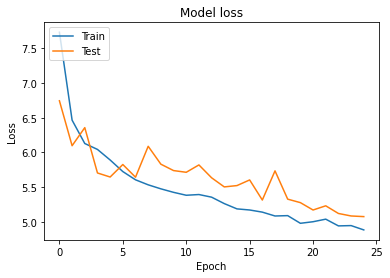

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

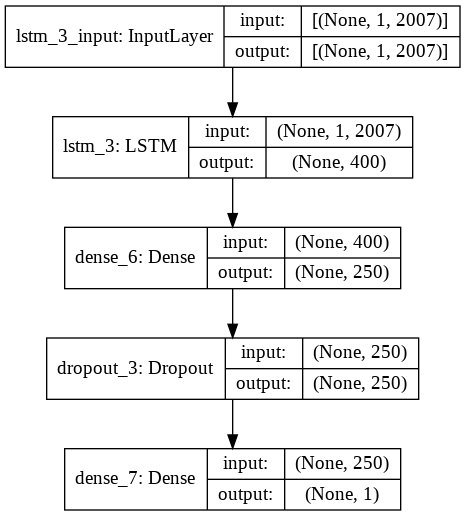

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
X_test.shape

(4263, 2007)

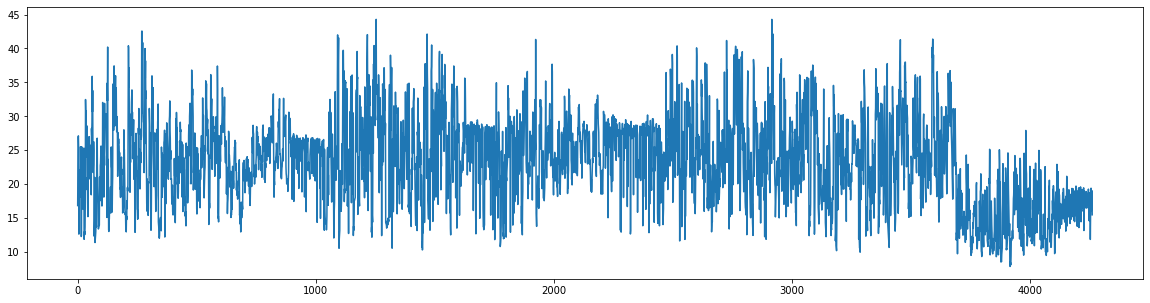

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
X_test = X_test[:,np.newaxis,:]
prediction = model.predict(X_test)
#prediction=model.predict(new_test)
plt.figure(figsize=(20,5))
plt.plot(prediction)

In [ ]:
sub=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Deeplearning project/submission.csv',sep=',')
sub['1']=prediction
sub.to_csv('/content/drive/My Drive/Colab Notebooks/Deeplearning project/predict_1.csv',index=False)

In [ ]:
sub

,ID,1
0,480,16.856173
1,742,23.195242
2,743,26.904510
3,744,27.125433
4,745,25.395725
...,...,...
4258,37481,16.023472
4259,37482,16.698488
4260,37483,17.421259
4261,37484,19.036230
